In [1]:
import pandas as pd
import numpy as np
import random
from preprocess_no_eth_with_flow import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



normal_df = pd.read_csv('data/normal1.csv')
processed_normal = process_df(normal_df)

attack_df = pd.read_csv('data/attack1.csv')
processed_attack = process_df(attack_df)

In [2]:
x_normal_train, x_normal_test = train_test_split(processed_normal.values, test_size=0.2, random_state=42)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(10, input_dim=processed_normal.values.shape[1], activation='LeakyReLU'))
model.add(Dense(3, activation='LeakyReLU')) # size to compress to
model.add(Dense(10, activation='LeakyReLU'))
model.add(Dense(processed_normal.values.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=20)
model.save("really_basic_model_v2")

Metal device set to: Apple M1 Pro
Epoch 1/20


2022-03-20 22:43:12.058846: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-20 22:43:12.058960: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-03-20 22:43:12.134560: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-20 22:43:12.244390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3514/3514 [==============================] - 14s 4ms/step - loss: 0.0214
Epoch 2/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0043
Epoch 3/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0038
Epoch 4/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0036
Epoch 5/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0034
Epoch 6/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0032
Epoch 7/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0029
Epoch 8/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0025
Epoch 9/20
3514/3514 [==============================] - 14s 4ms/step - loss: 0.0023
Epoch 10/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0020
Epoch 11/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0019
Epoch 12/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0017


2022-03-20 22:47:46.445400: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: really_basic_model_v2/assets


INFO:tensorflow:Assets written to: really_basic_model_v2/assets


In [6]:
from sklearn import metrics
pred_normal_train = model.predict(x_normal_train)
print(np.sqrt(metrics.mean_squared_error(pred_normal_train,x_normal_train)))

pred_normal_test = model.predict(x_normal_test)
print(np.sqrt(metrics.mean_squared_error(pred_normal_test,x_normal_test)))

2022-03-20 22:47:46.703568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.03630142441765131
0.03648013469466691


In [7]:
pro_values = processed_attack.values
pred_attack = model.predict(pro_values)

<AxesSubplot:>

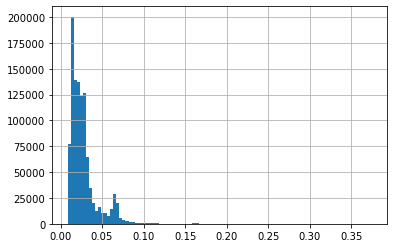

In [8]:
score_list = []
for index, x in enumerate(pred_attack):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred_attack[index],pro_values[index])))

attack_df['score'] = score_list
attack_df['score'].hist(bins = 100)

0.0663657109001582

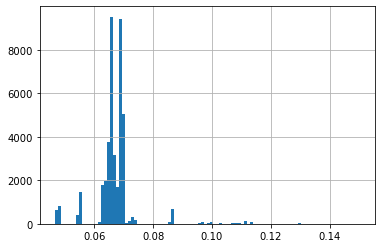

In [9]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']


# In[15]:


nmap_df['score'].hist(bins = 100)


# In[20]:


nmap_df['score'].median()

In [11]:
attack_df['score'].describe().apply(lambda x: format(x, 'f'))

count    1070554.000000
mean           0.027703
std            0.019773
min            0.008580
25%            0.015772
50%            0.022706
75%            0.030520
max            0.375144
Name: score, dtype: object

In [12]:
nmap_df['score'].describe().apply(lambda x: format(x, 'f'))

count    41824.000000
mean         0.066699
std          0.007557
min          0.046533
25%          0.064898
50%          0.066366
75%          0.068778
max          0.150119
Name: score, dtype: object

In [16]:
attack_df['score'].quantile(0.95)

0.06602165455534072